### Benchmark

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
data = (
    pd.read_csv('../data/energydata_complete.csv')
    .drop(['date', 'rv1', 'rv2'], axis=1)
    .assign(target = lambda k: k.lights + k.Appliances)
    .drop(['lights', 'Appliances'], axis=1)
)

In [72]:
### Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1),
    data.target,
    test_size=0.2,
    random_state=42
)

### Fit a linear model

In [73]:
# Fit a logistic regression model
model = LinearRegression().fit(X_train, y_train)

y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

# print score
print('Test score: ', model.score(X_test, y_test))
print('Train score: ', model.score(X_train, y_train))

# print RMSE
print('Test RMSE: ', mean_squared_error(y_test, y_predict, squared=False))
print('Train RMSE: ', mean_squared_error(y_train, y_predict_train, squared=False))

Test score:  0.15443028306596474
Train score:  0.15369290883299713
Test RMSE:  93.86041531536121
Train RMSE:  96.54420995665981


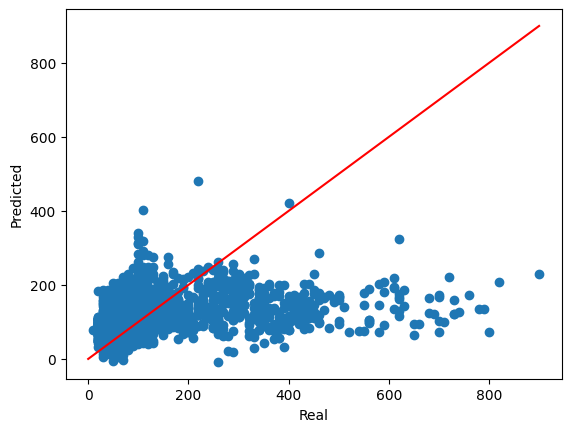

In [74]:
# plot real vs predicted
plt.scatter(y_test, y_predict)
max_value = max(y_test.max(), y_predict.max())
plt.plot([0, max_value], [0, max_value], color='red')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

### Fit a linear model after standardizing the data

In [11]:
# normalize data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a logistic regression model
model = LinearRegression().fit(X_train_scaled, y_train)

y_predict = model.predict(X_test_scaled)
y_predict_train = model.predict(X_train_scaled)

# print score
print('Test score: ', model.score(X_test_scaled, y_test))
print('Train score: ', model.score(X_train_scaled, y_train))

# print RMSE
print('Test RMSE: ', mean_squared_error(y_test, y_predict, squared=False))
print('Train RMSE: ', mean_squared_error(y_train, y_predict_train, squared=False))

Test score:  0.15443028306596474
Train score:  0.15369290883299724
Test RMSE:  93.86041531536121
Train RMSE:  96.5442099566598


### Fit a linear model after standardizing and remove correlated features

In [13]:
from Utils import selection_by_corr

# normalize data
scaler = StandardScaler()
scaler.set_output(transform="pandas")
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Filter features
selected_cols = selection_by_corr(X_train_scaled, threshold=0.7)
X_train_selected = X_train_scaled[selected_cols]
X_test_selected = X_test_scaled[selected_cols]

# Fit a logistic regression model
model = LinearRegression().fit(X_train_selected, y_train)

y_predict = model.predict(X_test_selected)
y_predict_train = model.predict(X_train_selected)

# print score
print('Test score: ', model.score(X_test_selected, y_test))
print('Train score: ', model.score(X_train_selected, y_train))

# print RMSE
print('Test RMSE: ', mean_squared_error(y_test, y_predict, squared=False))
print('Train RMSE: ', mean_squared_error(y_train, y_predict_train, squared=False))

Test score:  0.03253646478801542
Train score:  0.02984690758698272
Test RMSE:  100.39800050218182
Train RMSE:  103.36711120281288


### Fit a linear model after standarization and PLS

In [14]:
# normalize data
scaler = StandardScaler()
scaler.set_output(transform="pandas")
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# pls regression
pls = PLSRegression(n_components=10)
pls.fit(X_train_scaled, y_train)

y_predict = pls.predict(X_test_scaled)

# print score
print('Test score: ', pls.score(X_test_scaled, y_test))
print('Train score: ', pls.score(X_train_scaled, y_train))

# print RMSE
print('Test RMSE: ', mean_squared_error(y_test, y_predict, squared=False))
print('Train RMSE: ', mean_squared_error(y_train, pls.predict(X_train_scaled), squared=False))

Test score:  0.1517557751115136
Train score:  0.15005346137442566
Test RMSE:  94.0087367579918
Train RMSE:  96.75157595844112


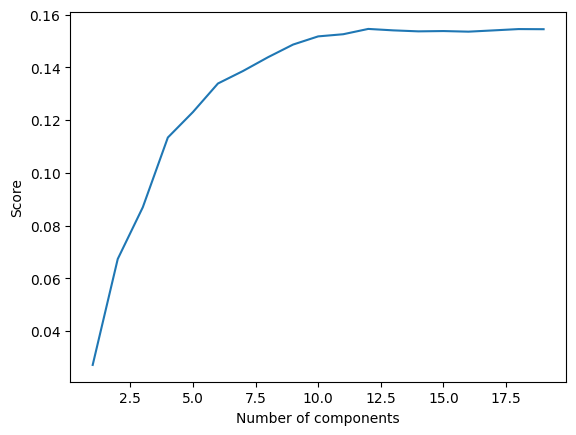

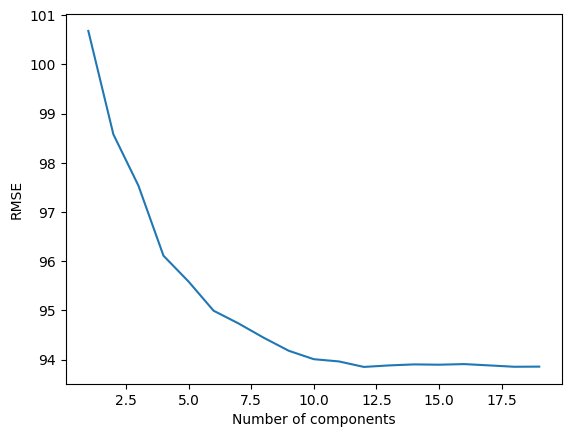

In [15]:
# for every n_components, calculate the score and then plot the results

# normalize data
scaler = StandardScaler()
scaler.set_output(transform="pandas")
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# pls regression
components = np.arange(1, 20)
scores, rmse = [], []
for n in components:
    pls = PLSRegression(n_components=n)
    pls.fit(X_train_scaled, y_train)
    y_predict = pls.predict(X_test_scaled)
    scores.append(pls.score(X_test_scaled, y_test))
    rmse.append(mean_squared_error(y_test, y_predict, squared=False))

plt.plot(components, scores)
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.show()

plt.plot(components, rmse)
plt.xlabel('Number of components')
plt.ylabel('RMSE')
plt.show()

### Fit alinear model transforming the target variable

In [41]:
## log transform target
# normalize data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_transformed = np.log(y_train)
y_test_transformed = np.log(y_test)

# Fit a logistic regression model
model = LinearRegression().fit(X_train_scaled, y_train_transformed)

y_predict = np.exp(model.predict(X_test_scaled))
y_predict_train = np.exp(model.predict(X_train_scaled))

y_train_transformed = np.exp(y_train_transformed)
y_test_transformed = np.exp(y_test_transformed)

# print score
print('Test score: ', model.score(X_test_scaled, y_test_transformed))
print('Train score: ', model.score(X_train_scaled, y_train_transformed))

# print RMSE
print('Test RMSE: ', mean_squared_error(y_test_transformed, y_predict, squared=False))
print('Train RMSE: ', mean_squared_error(y_train_transformed, y_predict_train, squared=False))

Test score:  -0.883688383892393
Train score:  -0.8592481546966504
Test RMSE:  97.95996425043336
Train RMSE:  99.73859786015635


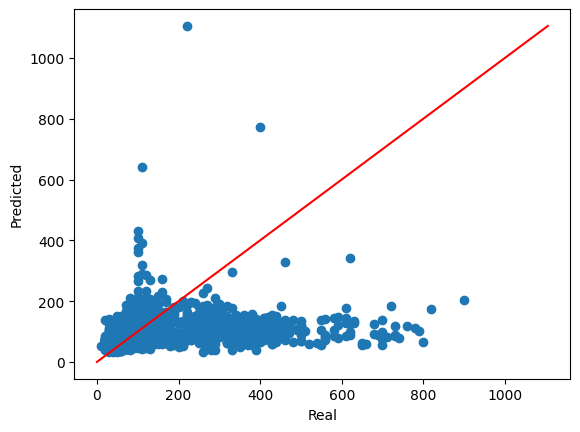

In [42]:
# plot real vs predicted
plt.scatter(y_test_transformed, y_predict)
max_value = max(y_test_transformed.max(), y_predict.max())
plt.plot([0, max_value], [0, max_value], color='red')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [25]:
## root square
# normalize data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_transformed = np.sqrt(y_train)
y_test_transformed = np.sqrt(y_test)

# Fit a logistic regression model
model = LinearRegression().fit(X_train_scaled, y_train_transformed)

y_predict = np.square(model.predict(X_test_scaled))
y_predict_train = np.square(model.predict(X_train_scaled))

y_train_transformed = np.square(y_train_transformed)
y_test_transformed = np.square(y_test_transformed)

# print score
print('Test score: ', model.score(X_test_scaled, y_test_transformed))
print('Train score: ', model.score(X_train_scaled, y_train_transformed))

# print RMSE
print('Test RMSE: ', mean_squared_error(y_test_transformed, y_predict, squared=False))
print('Train RMSE: ', mean_squared_error(y_train_transformed, y_predict_train, squared=False))

Test score:  -0.7818981828908895
Train score:  -0.7629941393665896
Test RMSE:  94.50695948081406
Train RMSE:  97.41965297425587


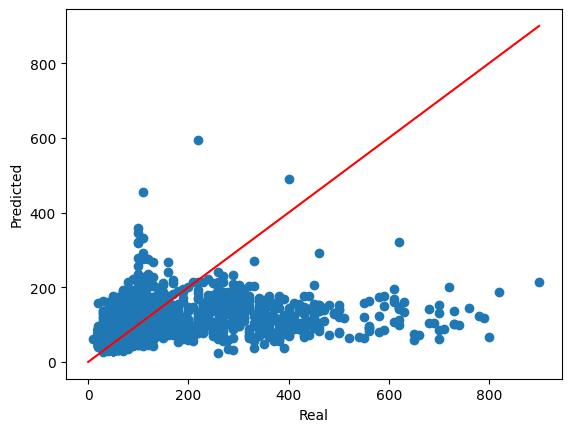

In [26]:
# plot real vs predicted
plt.scatter(y_test_transformed, y_predict)
max_value = max(y_test_transformed.max(), y_predict.max())
plt.plot([0, max_value], [0, max_value], color='red')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

<Axes: >

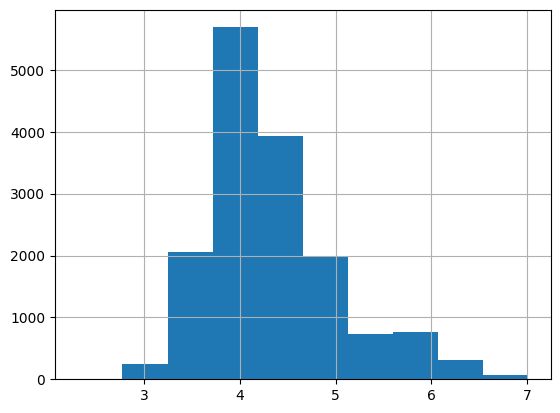

In [40]:
np.log(y_train).hist()

In [64]:
# Fit a logistic regression model
model = Lasso().fit(X_train, y_train)

y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

# print score
print('Test score: ', model.score(X_test, y_test))
print('Train score: ', model.score(X_train, y_train))

# print RMSE
print('Test RMSE: ', mean_squared_error(y_test, y_predict, squared=False))
print('Train RMSE: ', mean_squared_error(y_train, y_predict_train, squared=False))

Test score:  0.1532507836881969
Train score:  0.1522865806795315
Test RMSE:  93.92585623580341
Train RMSE:  96.62439153881087
